# Twitter US Airline Sentiment 

In [ ]:
!pip install fastai==2.0.10

     |████████████████████████████████| 358kB 3.0MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [ ]:
from fastai.text.all import *

## Dataset

In [ ]:
# Install Kaggle API
!pip install -q kaggle
!pip install -q kaggle-cli

     |████████████████████████████████| 81kB 2.8MB/s 
     |████████████████████████████████| 5.3MB 8.8MB/s 
     |████████████████████████████████| 112kB 46.9MB/s 
     |████████████████████████████████| 133kB 48.6MB/s 
     |████████████████████████████████| 51kB 8.0MB/s 


In [ ]:
# only for google colab
import os
os.environ['KAGGLE_USERNAME'] = "<username>" 
os.environ['KAGGLE_KEY'] = "<key>"

In [ ]:
path = Path('twitter-sentiment')
path.mkdir(parents=True, exist_ok=True)

In [ ]:
! kaggle datasets download crowdflower/twitter-airline-sentiment -p "{path}" --unzip

  0% 0.00/2.55M [00:00<?, ?B/s]
100% 2.55M/2.55M [00:00<00:00, 85.8MB/s]


In [ ]:
df = pd.read_csv(path/'Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
train_df, valid_df = df.loc[:12000,:], df.loc[12000:,:]
len(train_df), len(valid_df)

(12001, 2640)

In [ ]:
dls = TextDataLoaders.from_df(df, path=path, text_col="text", label_col="airline_sentiment", valid_pct=0.2)

In [ ]:
dls.show_batch()

,text,category
0,xxbos @united xxmaj hi have a question re future xxmaj flight xxmaj booking xxmaj problems . xxup dub - jac 29 / 9 xxup jac - lax 8 / 10 xxup lax - dub 13 / 10 . xxmaj i 'm * xxunk xxmaj what is checked bag allowance for xxup jac - lax ?,neutral
1,xxbos @united xxup where xxup is xxup my xxup fucking xxup bag ? ! ? ! xxmaj where the fuck is my fucking bag xxrep 3 ? xxup tell xxup me xxup now xxup or xxup give xxup me a xxup number xxup to xxup call a xxup human . xxup xxunk m xxpad xxpad,negative
2,xxbos @usairways xxup plans xxup changed ! xxup is xxup that xxup what u xxup call xxup not xxup xxunk xxup able 2 xxup park xxup on xxup time xxup planes w a 2 xxup hr xxup layover n b xxup able 2 xxup make xxup ur xxup connection ! # seriously xxpad xxpad xxpad,negative
3,"xxbos @usairways e xxrep 4 y ! xxmaj cancelled xxmaj flightlations , xxmaj flight xxmaj booking xxmaj problemss , reflight xxmaj booking xxmaj problemss , but y' all got me on the same flight out tonight ( not tomorrow ) & & the xxup fc upgrade . xxmaj thx ! xxpad xxpad xxpad xxpad xxpad",positive
4,"xxbos @united xxmaj well , xxmaj it 's xxup la and then a xxunk car ride to a dark xxmaj palm xxmaj springs technically . xxmaj maybe xxmaj i 'll get bumped to 1st class xxmaj den to xxup phl on xxmaj friday : ) xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad",neutral
5,"xxbos @usairways i need help . xxmaj in air on # xxunk to xxup clt from xxup phl . xxmaj conf : xxup xxunk xxmaj need confirmed on # xxunk to xxup bna at 10:30 . xxmaj been bumped all day , need home xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad",negative
6,"xxbos @jetblue xxmaj thanks . xxmaj still booked our trip 3 / 13 - 17 xxup lb to xxup slc to see grand kids . xxmaj just very frustrating . xxmaj tried app , web , etc . xxmaj still love u guys ! xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad",positive
7,"xxbos @usairways yes , i am as well . * * five * * xxup hours xxup on xxup hold , xxup folks . xxmaj can you xxup please tell me if this is typical ? ! xxmaj trying to be understanding here . xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad",negative
8,xxbos @jetblue xxmaj flight 136 departs xxunk xxup am xxmaj finally xxrep 3 ! xxmaj arrived xxup jfk with no xxunk at xxunk xxup pm . xxmaj that 's a long flight . xxup aka xxup bus http : / / t.co / xxunk xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad,negative


## Text Classifier

In [ ]:
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.3, metrics=accuracy)

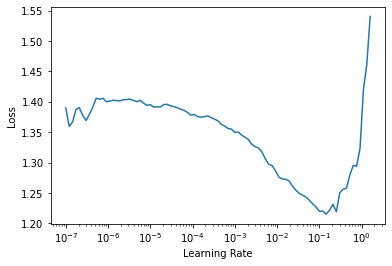

In [ ]:
lr_min, lr_steep = learn.lr_find()

In [ ]:
learn.fine_tune(4, lr_min)

epoch,train_loss,valid_loss,accuracy,time
0,0.947414,0.661542,0.737363,00:19


epoch,train_loss,valid_loss,accuracy,time
0,0.656584,0.553044,0.773566,00:20
1,0.519049,0.528895,0.800546,00:20
2,0.372266,0.514347,0.812158,00:20
3,0.260056,0.552320,0.815574,00:20


In [ ]:
learn.show_results()

,text,category,category_
0,xxbos @united i xxup just xxup asked xxup my xxup boyfriend xxup to xxup xxunk xxup over xxup the xxup xxunk xxup on xxup flight xxunk xxup he xxup said xxup yes xxrep 4 ! xxup best xxup day xxup ever xxrep 3 ! xxup thank u xxup so xxup much xxrep 6 !,positive,positive
1,xxbos @virginamerica xxmaj many xxmaj thanks for the xxmaj follow . \n▁ # xxunk # xxunk # xxup usa # xxmaj xxunk \n xxmaj looking for xxmaj any xxmaj help 😍 \n 💗 🇬 🇧 💗 🇺 🇸 💗 \n 🎀 xxunk 🎀 http : / / t.co / xxunk xxpad xxpad xxpad xxpad,neutral,neutral
2,"xxbos @jetblue i ❤ ️ xxmaj jetblue but i was on flt xxunk from fll to sfo . xxunk off was over 1 hr xxmaj late xxmaj flight , div to phx & & got in 2 hrs xxmaj late xxmaj flight . xxmaj what will be done ? xxpad xxpad xxpad xxpad xxpad",negative,negative
3,xxbos @united xxup fail xxmaj you xxmaj cancelled xxmaj flightled our flight frm xxup xxunk and then used our reserv home to xxup iah ( from xxup sea ) for reflight xxmaj booking xxmaj problems w / out xxup our xxup xxunk ! ! # xxup xxunk xxpad xxpad xxpad xxpad xxpad xxpad xxpad,negative,negative
4,"xxbos @southwestair i had to travel to xxmaj savannah , xxup xxunk , once again , on an airline i do n't "" luv "" . xxmaj when r u going to fly me to xxmaj savannah ? xxmaj pl xxrep 4 e ase xxrep 4 ! xxpad xxpad xxpad xxpad xxpad xxpad xxpad",neutral,negative
5,xxbos @united xxunk 7 xxup weeks xxmaj late flightr xxup and i xxup still xxup have xxup not xxup received xxup my xxup miles xxup from xxup the mileageplus xxmaj gift xxmaj card $ 150 xxup xxunk xxup card i xxup handed xxup over xxrep 3 ! xxpad xxpad xxpad xxpad xxpad xxpad xxpad,negative,negative
6,"xxbos @southwestair xxmaj loved one 's flight xxup atl to xxup ind xxmaj cancelled xxmaj flightled due to "" ice in xxmaj indy "" . xxmaj sitting here in xxmaj indy , it is xxunk dry . xxmaj tomorrow 4 - 6 "" of snow . xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad",negative,negative
7,xxbos @americanair xxmaj hi . i have xxup koa - lax - phl - ord booked as a 1-way xxunk xxunk . xxmaj if i called to xxunk it to xxup koa - lax - phx - ord would i have to pay any fees xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad,neutral,negative
8,xxbos xxup but @united just re - booked to xxup bos ; xxup xxunk ! ! now 3 hour bus to xxup xxunk home . xxmaj could have flown to xxup bdl & & back to xxup dc in same time . # unitedairlines xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad,negative,negative
